In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sbrn
import numpy as np
import re
import datetime

%matplotlib inline

In [3]:
dat = pd.read_csv('./../../data/water_pump/training.csv', header=0)
labels = pd.read_csv('./../../data/water_pump/training_labels.csv', header=0)
#join labels to dat on "id" (left outer)

dat=dat.merge(labels, how='left', left_on='id', right_on='id',copy=False)

In [33]:
dat.columns

Index([u'id', u'amount_tsh', u'date_recorded', u'funder', u'gps_height',
       u'installer', u'longitude', u'latitude', u'wpt_name', u'num_private',
       u'basin', u'subvillage', u'region', u'region_code', u'district_code',
       u'lga', u'ward', u'population', u'public_meeting', u'recorded_by',
       u'scheme_management', u'scheme_name', u'permit', u'construction_year',
       u'extraction_type', u'extraction_type_group', u'extraction_type_class',
       u'management', u'management_group', u'payment', u'payment_type',
       u'water_quality', u'quality_group', u'quantity', u'quantity_group',
       u'source', u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group', u'status_group'],
      dtype='object')

In [7]:
dat.population.replace(to_replace={0:np.nan}, inplace=True)

In [27]:
dat.population.isnull().sum()

21381

In [35]:
#let's look at population by imputing with mean population in neighboring areas, in this order:
#sub-village > ward > lga > region_code

dat.population.fillna(dat.groupby(['subvillage'])['population'].transform('mean'), inplace=True)
dat.population.fillna(dat.groupby(['ward'])['population'].transform('mean'), inplace=True)
dat.population.fillna(dat.groupby(['lga'])['population'].transform('mean'), inplace=True)
dat.population.fillna(dat.groupby(['region_code'])['population'].transform('mean'), inplace=True)




status_group
functional                 Axes(0.125,0.125;0.775x0.775)
functional needs repair    Axes(0.125,0.125;0.775x0.775)
non functional             Axes(0.125,0.125;0.775x0.775)
Name: population, dtype: object

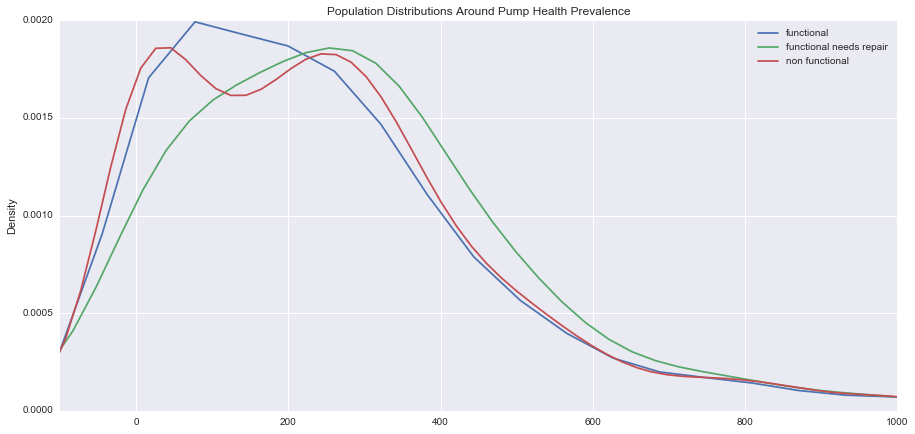

In [52]:
dat.groupby(dat.status_group)['population'].plot.kde(legend=True, title='Population Distributions Around Pump Health Prevalence', xlim=(-100,1000), figsize=(15,7)) #pop around the well